<a href="https://colab.research.google.com/github/HamiltonLROliveira/ciencia_dados_puc_rj/blob/main/anal_expl_viagens_gov_federal_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df_passagens.shape

In [ ]:
df_passagens.info()

In [ ]:
df_passagens.head()

In [ ]:
df_pgto.shape

In [ ]:
df_pgto.info()

In [ ]:
df_pgto.head()

In [ ]:
df_pgto_1 = df_pgto[["Identificador do processo de viagem", 'Nome do órgão superior', 'Nome do órgao pagador']]

In [ ]:
df_pgto_1 = df_pgto_1[~df_pgto.duplicated(subset=["Identificador do processo de viagem", 'Nome do órgão superior', 'Nome do órgao pagador'])].reset_index(drop=True)

In [ ]:
df_pgto_1.shape

In [ ]:
df_pgto_1.head()

In [ ]:
df_passagens_1 = df_passagens.merge(df_pgto_1, how='left',  left_on='Identificador do processo de viagem', right_on='Identificador do processo de viagem')

In [ ]:
df_passagens_1.shape

In [ ]:
df_passagens_1.info()

In [ ]:
df_passagens_1.head()

In [ ]:
"""
Tratamento em todas as colunas para colocar o valor None quando o valor for 'Não informado' ou NaN
"""
for c in df_passagens.columns:
    df_passagens[c] = df_passagens[c].apply(lambda x: x if x != 'Sem Informação' and pd.notnull(x) else None)

In [ ]:
"""
A conversão pode ser feita utilizando o método apply da série que deseja converter.
"""
def converter_numero(valor):
    try:
        return float(valor.replace('.', '').replace(',', '.'))
    except:
        return np.nan

In [ ]:
df_passagens_1['Valor da passagem'] = \
    df_passagens_1['Valor da passagem'].apply(converter_numero)
df_passagens_1['Taxa de serviço'] =  \
    df_passagens_1['Taxa de serviço'].apply(converter_numero)

In [ ]:
df_passagens_1['Identificador do processo de viagem'] = df_passagens_1['Identificador do processo de viagem'].apply(lambda x: str(int(x)))

In [ ]:
df_passagens_1.info()

In [ ]:
df_passagens_1.head()

In [ ]:
df_passagens_1.describe()

In [ ]:
df_passagens_1 = df_passagens_1.drop('Taxa de serviço', axis=1)

In [ ]:
df_passagens_g = df_passagens_1[df_passagens_1['Valor da passagem'] > 0.001]
plt.rcParams['figure.figsize'] = 5,6
ax = sns.boxplot(y=df_passagens_g['Valor da passagem'])
ax.set_yscale('log')
#ax.plot(x=[-1000, 1000], y=[2000,2000], color='red', linewidth=2, markersize=12)
plt.grid(True)
plt.show()

In [ ]:
df_passagens_1.info()

In [ ]:
colunas_gb = ['País - Origem ida', 'UF - Origem ida', 'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida', 'Cidade - Destino ida']

colunas_selecao = ['País - Origem ida', 'UF - Origem ida',
                   'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida',
                   'Cidade - Destino ida', 'Valor da passagem']

df_passagens_1[colunas_selecao]\
    .groupby(colunas_gb, as_index=False)\
    .agg(['count', 'mean', 'median'])\
    .sort_values(('Valor da passagem', 'count'), ascending=False)\
    .head(10)

In [ ]:
df_passagens_1['Meio de transporte'].unique()

In [ ]:
df_passagens_1 = df_passagens_1[(df_passagens_1['Meio de transporte'] == 'Aéreo')]

In [ ]:
df_passagens_1.shape

In [ ]:
df_passagens_2 = df_passagens_1[(df_passagens_1['Cidade - Origem ida'] == 'Rio de Janeiro') & (df_passagens_1['Cidade - Destino ida'] == 'Brasília')]

In [ ]:
df_passagens_2.shape

In [ ]:
df_passagens_2.info()

In [ ]:
df_passagens_2.describe()

In [ ]:
df_eixos = df_passagens_2.groupby(["Nome do órgão superior"]).size().to_frame()
orgaos = df_eixos.index.to_list()
df_eixos = df_eixos.reset_index(drop=True)
df_eixos.columns = ["Qtde"]
df_eixos.insert(0, "órgão superior", orgaos)
#df_eixos

In [ ]:
# criando o gráfico de barras
df_eixos_ordem_qtde = df_eixos.sort_values(["Qtde"] , ascending=True)
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgão superior"], df_eixos_ordem_qtde["Qtde"])
ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Numero de viagens por órgão superior")
plt.ylabel("Órgão Superior")
plt.xlabel("Número de viagens");
plt.show()

In [ ]:
df_eixos = df_passagens_2.groupby(["Nome do órgão superior"])['Valor da passagem'].sum().to_frame()
orgaos = df_eixos.index.to_list()
df_eixos = df_eixos.reset_index(drop=True)
df_eixos.columns = ["Valor Total"]
df_eixos.insert(0, "órgão superior", orgaos)
#df_eixos

In [ ]:
# criando o gráfico de barras
df_eixos_ordem_qtde = df_eixos.sort_values(["Valor Total"] , ascending=True)
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgão superior"], df_eixos_ordem_qtde["Valor Total"])
#ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Valor Total com Viagens por Órgão Superior")
plt.ylabel("Órgão Superior")
plt.xlabel("Valor Total");
plt.show()

In [ ]:
df_eixos = df_passagens_2.groupby(["Nome do órgao pagador"]).size().to_frame()
orgaos = df_eixos.index.to_list()
df_eixos = df_eixos.reset_index(drop=True)
df_eixos.columns = ["Qtde"]
df_eixos.insert(0, "órgao pagador", orgaos)
df_eixos_ordem_qtde = df_eixos.sort_values(["Qtde"] , ascending=False)
df_eixos_ordem_qtde = df_eixos_ordem_qtde.head(30)
df_eixos_ordem_qtde = df_eixos_ordem_qtde.sort_values(["Qtde"] , ascending=True)

In [ ]:
# criando o gráfico de barras
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgao pagador"], df_eixos_ordem_qtde["Qtde"])
ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Qtde de Viagens por Órgao pagador")
plt.ylabel("Órgao Pagador")
plt.xlabel("Quantidade");
plt.show()

In [ ]:
df_eixos = df_passagens_2.groupby(["Nome do órgao pagador"])['Valor da passagem'].sum().to_frame()
orgaos = df_eixos.index.to_list()
df_eixos = df_eixos.reset_index(drop=True)
df_eixos.columns = ["Valor Total"]
df_eixos.insert(0, "órgao pagador", orgaos)
df_eixos_ordem_qtde = df_eixos.sort_values(["Valor Total"] , ascending=False)
df_eixos_ordem_qtde = df_eixos_ordem_qtde.head(30)
df_eixos_ordem_qtde = df_eixos_ordem_qtde.sort_values(["Valor Total"] , ascending=True)
#df_eixos

In [ ]:
# criando o gráfico de barras
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgao pagador"], df_eixos_ordem_qtde["Valor Total"])
#ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Valor Total com Viagens por Órgao pagador")
plt.ylabel("Órgao Pagador")
plt.xlabel("Valor Total");
plt.show()

In [ ]:
df_orgao_superior = df_passagens_2.groupby(["Nome do órgão superior"])['Valor da passagem'].agg(['count', 'mean', 'median'])
orgaos = df_orgao_superior.index.to_list()
df_orgao_superior = df_orgao_superior.reset_index(drop=True)
df_orgao_superior.columns = ["Qtde", "Media", "Mediana"]
df_orgao_superior.insert(0, "Orgao Superior", orgaos)
df_orgao_superior = df_orgao_superior.sort_values(["Media"] , ascending=True)
df_orgao_superior

In [ ]:
# criando o gráfico de barras
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_orgao_superior["Orgao Superior"], df_orgao_superior["Media"])
ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Valor Medio das Viagens por Órgao Superior")
plt.ylabel("Órgao Superior")
plt.xlabel("Media");
plt.show()

In [ ]:
ls_orgao_acima_meda = df_orgao_superior[df_orgao_superior["Media"] >  1493.17]["Orgao Superior"].tolist()
df_passagens_2["Relacao_media"] = df_passagens_2["Nome do órgão superior"].apply(lambda x: "Acima da Media" if x in ls_orgao_acima_meda  else "Abaixo da Media")
# Boxplot
df_passagens_2[(df_passagens_2["Relacao_media"] == "Acima da Media")].plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (20,15))
plt.show()

In [ ]:
df_orgao_menor_media = df_passagens_2[df_passagens_2["Nome do órgão superior"] == "Banco Central do Brasil - Orçamento Fiscal e Seguridade Social"]
# Boxplot
df_passagens_2[(df_passagens_2["Relacao_media"] == "Abaixo da Media")].plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (20,15))
plt.show()

# Nova seção

# MVP de Análise de Dados e Boas Práticas
Hamilton Luiz Rodrigues de Oliveira

#1. Definição do Problema

O Dataset utilizado neste projeto é o registro das despesas com transporte em viagens a serviço do Governo Federal durante o ano de 2023, disponível no Portal da Transparência do Governo Federal em (https://portaldatransparencia.gov.br/download-de-dados).
O dataset é composto de quatro tabelas que são Pagamento, Passagem, Trecho e Viagem. Foram utilizadas efetivamente as tabelas Pagamento e Passagem cujas colunas serão descritas a seguir.

Informações sobre os atributos da tabela Passagem:

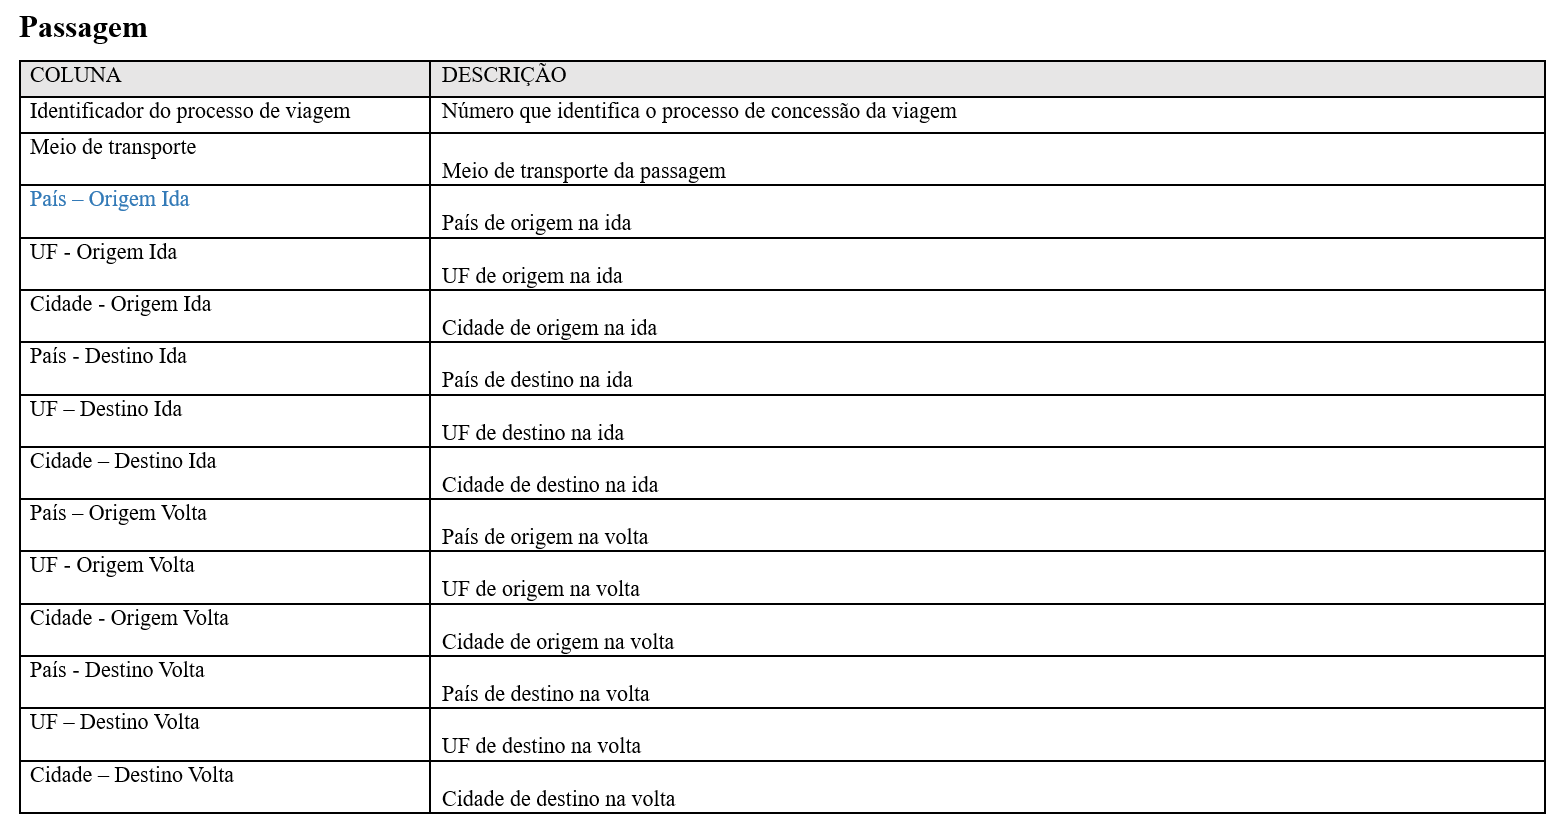

Informações sobre a tabela Pagamento:

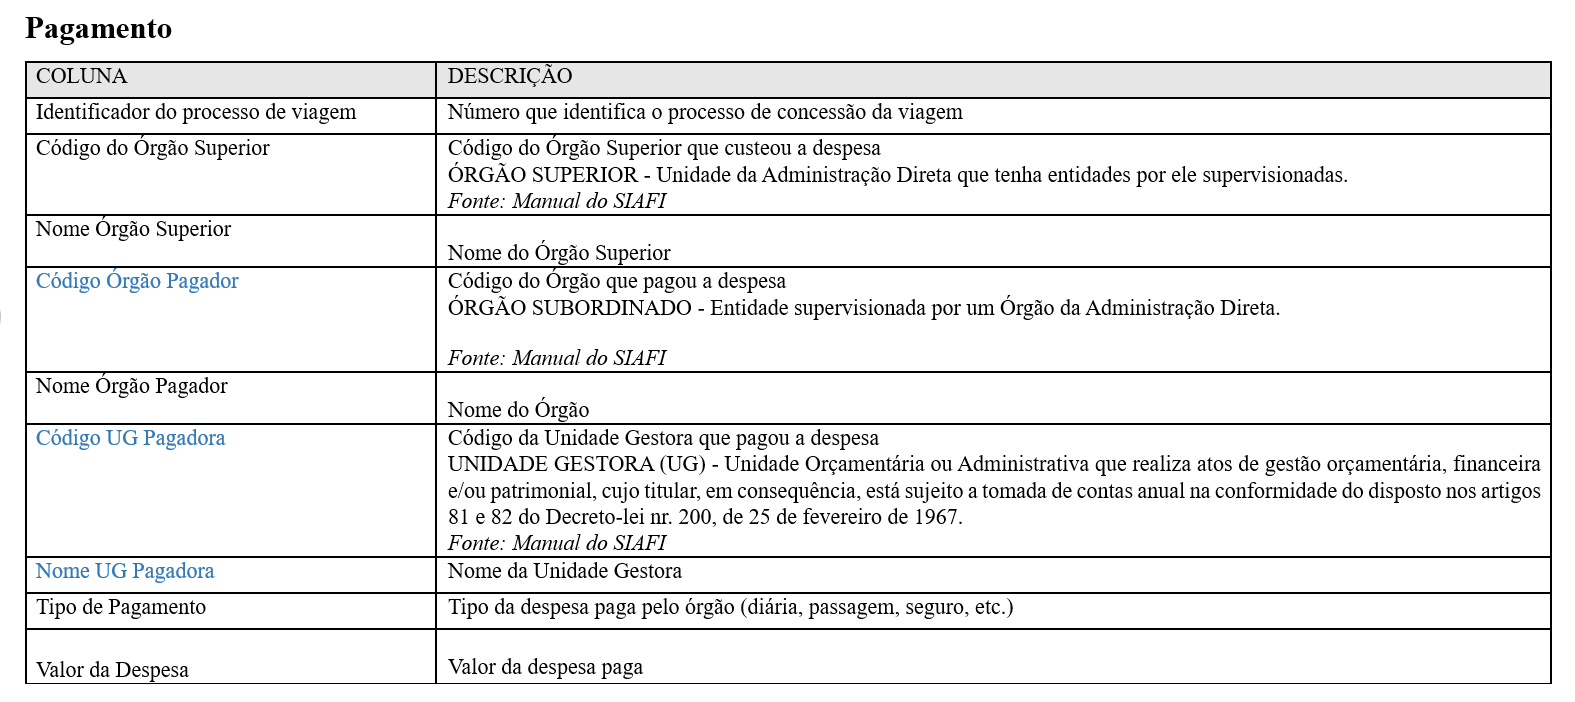

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from datetime import datetime

# 2. Carga dos Dados
Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv com cabeçalho na primeira linha dos arquivos.

Com o dataset carregado, iremos explorá-lo um pouco.

In [ ]:
# Carrega arquivo Passagem em csv e zipado usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/HamiltonLROliveira/ciencia_dados_puc_rj/main/2023_Passagem.zip"

# Lê o arquivo utilizando as colunas informadas
df_passagens = pd.read_csv(url, sep=';', encoding='latin1' )

In [287]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/HamiltonLROliveira/ciencia_dados_puc_rj/main/2023_Pagamento.zip"

# Lê o arquivo utilizando as colunas informadas
df_pgto = pd.read_csv(url, sep=';', encoding='latin1' )